# CLASSIFICATION

In [37]:
import pandas as pd 
import numpy as np 
import seaborn as sns

In [3]:
bankloan = pd.read_csv('bankloan.csv')
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [5]:
fitur = ['employ','debtinc','creddebt','othdebt']
target = ['default']

X = bankloan[fitur]
y = bankloan[target]

In [6]:
X.describe()

,employ,debtinc,creddebt,othdebt
count,700.000000,700.000000,700.000000,700.000000
mean,8.388571,10.260571,1.553553,3.058209
std,6.658039,6.827234,2.117197,3.287555
min,0.000000,0.400000,0.011696,0.045584
25%,3.000000,5.000000,0.369059,1.044178
50%,7.000000,8.600000,0.854869,1.987567
75%,12.000000,14.125000,1.901955,3.923065
max,31.000000,41.300000,20.561310,27.033600


## Modeling

In [8]:
import statsmodels.api as sm 

In [9]:
# fitting data (model mempelajari data kita)

sm_logit = sm.Logit(y, sm.add_constant(X))
result = sm_logit.fit()

Optimization terminated successfully.
         Current function value: 0.411165
         Iterations 7


In [10]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Fri, 08 Jan 2021   Pseudo R-squ.:                  0.2844
Time:                        09:34:03   Log-Likelihood:                -287.82
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 2.473e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2302      0.236     -5.210      0.000      -1.693      -0.767
employ        -0.2436      0.029     -8.456      0.000      -0.300      -0.187
debtinc        0.0885      0.021      4.200      0.0

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
def calc_vif(X):

    # calculating vif
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]

    return(vif)

In [13]:
calc_vif(X)

,variables,VIF
0,employ,2.222753
1,debtinc,3.045977
2,creddebt,2.816577
3,othdebt,4.116876


Tidak ada masalah dengan multicollinearity

## Model Interpretation

In [16]:
# menghitung nilai odds

# employ coeff = -0.2436
np.exp(0.2436*1)

# ketika employment bertambah 1 tahun dan tidak ada perubahan pada variable lain, resiko menjadi default (1: gagal bayar hutang) akan berkurang 1.27 kali 

1.2758338948511923

In [66]:
np.exp(-0.2436*1)

# dengan kata lain:
# ketika employment bertambah 1 tahun dan tidak ada perubahan pada variable lain, resiko menjadi default (1: gagal bayar hutang) akan menjadi 0.78 kalinya.

0.7838010920039364

In [15]:
# debtinc coeff = 0.0885
np.exp(0.0885*1)

# ketika ratio debt to income bertambah 1 dan tidak ada perubahan pada variable lain, resiko menjadi default (1: gagal bayar hutang) akan cenderung naik 1.09 kali 

1.0925342526104793

In [17]:
#  creddebt 0.5041
np.exp(0.5401*5)

 

14.887173451011767

## Validation

untuk meilhat seberapa akuratkah data kita

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
bankloan['default'].value_counts()
# perbandingan yg lunas vs gagal bayar adalah 517:183

0    517
1    183
Name: default, dtype: int64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify = y, # agar perbandingan jumlah data targetnya untuk train dan test (misal: default) nanti mirip dengan data aslinya
    test_size = 0.2, # proporsi test set adalah 20% dari total data
    random_state = 2020 # untuk memastikan data konsisten
    )

In [22]:
X_train

,employ,debtinc,creddebt,othdebt
382,2,16.0,4.003840,3.356160
344,18,13.4,4.521696,5.394304
265,7,6.4,0.630784,0.777216
52,16,12.9,3.032016,3.675984
370,13,9.6,1.875168,3.020832
...,...,...,...,...
476,3,16.3,0.352080,2.581920
135,6,2.2,0.452694,0.801306
506,19,4.7,0.397385,3.785615
684,18,10.5,0.840315,4.724685


In [24]:
# Classification dengan Logistic Regression

sm_logit_train = sm.Logit(y_train, sm.add_constant(X_train))
result_train = sm_logit_train.fit()

Optimization terminated successfully.
         Current function value: 0.411145
         Iterations 7


In [28]:
# memprediksi hasil probability dari X_test
y_predict_proba = result_train.predict(sm.add_constant(X_test))

# prediksi yg probability nya > 50% akan diubah menjadi 1 (gagal bayar)
y_predict_class = np.where(y_predict_proba>0.5, 1, 0)

In [26]:
y_predict_proba

118    0.584807
309    0.308932
339    0.308407
686    0.398796
639    0.236440
         ...   
597    0.544007
58     0.012081
467    0.102066
148    0.060111
681    0.214943
Length: 140, dtype: float64

In [29]:
y_predict_class

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0])

In [30]:
print('model accuracy in test dataset', accuracy_score(y_test, y_predict_class))

# accuracy = total prediksi yg benar dibagi total data

model accuracy in test dataset 0.8214285714285714


#  K Nearest Neighbor

In [36]:
wine = pd.read_csv('white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [38]:
wine['label'] = [1 if i>6 else 0 for i in wine['quality']]

In [39]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0


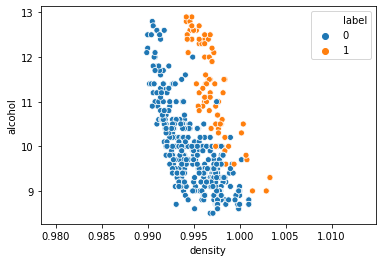

In [40]:
sns.scatterplot(x='density', y='alcohol', data=wine, hue='label')

In [41]:
# cek apakah ada null value
wine[['alcohol','density']].isnull().sum()

alcohol    1
density    0
dtype: int64

In [42]:
# isi null value pada kolom alcohol dgn nilai rata2 
wine['alcohol'].fillna(wine['alcohol'].mean(), inplace=True)

In [43]:
wine[['alcohol','density']].isnull().sum()
# sudah tidak ada null value

alcohol    0
density    0
dtype: int64

In [46]:
X = wine[['alcohol','density']]
y = wine['label']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    stratify = y, # agar perbandingan jumlah data targetnya untuk train dan test (misal: default) nanti mirip dengan data aslinya
    test_size = 0.2, # proporsi test set adalah 20% dari total data
    random_state = 2020 # untuk memastikan data konsisten
    )

In [48]:
from sklearn.neighbors import KNeighborsClassifier 

In [49]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_predict_class = knn.predict(X_test)

In [50]:
print('model accuracy in test dataset', accuracy_score(y_test, y_predict_class))

model accuracy in test dataset 0.9038461538461539


In [51]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
# Normalisasi data, agar tidak terjadi bias
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_predict_class = knn.predict(X_test_scaled)

In [62]:
print('model accuracy in test dataset', accuracy_score(y_test, y_predict_class))

model accuracy in test dataset 0.9807692307692307


### Setelah dinormalisasi, accuracy model naik dari 0.90 menjadi 0.98

In [ ]:
# Baca Elbow Method untuk penentuan jumlah neighbors (n_neighbors)

## Exercise
  
Gunakan cancer data untuk melakukan prediksi kemungkinan suatu tumor merupakan tumor ganas menggunakan model logistic regresi dan KNN. Pakai hanya data dengan "_mean" sebagai feature.  

Gunakan validasi train test split untuk mencari keakuratan prediksi kalian, dengan jumlah data test 20% dan random state 2020.

Manakan model terbaik untuk memprediksi data cancer berdasarkan accuracynya?

kalau ada missing data, didrop dulu saja
